In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
#import plotly.graph_objs as go
import seaborn as sns
sns.set()

In [2]:
%matplotlib inline

In [3]:
# Import data and create df

data = pd.read_csv("/Users/Stacy/Documents/WebDevelopment/projects/sexualAssault_datasets/2010-2018_sexcrimes_violentcrimes.csv", index_col="CAD Event Number")
data = pd.DataFrame(data)
data.head()

,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [4]:
# Rename columns to be pythonic

data.columns = ['event_clearing', 'call_type', 'priority', 
                'initial_call_type', 'final_call_type', 'original_time_queued',
               'arrived_time', 'precinct', 'sector', 'beat']

In [5]:
data.head(5)

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


## To Do
**Cleaning:**
* Clean out extra precinct values (one is 'unknown')
* Review if I need to delete rows with null sector value
* ~~Look at high number of lewd conduct calls with bad arrival dates (approx 50% of bad dates)~~
* ~~Delete cancelled_calls rows~~

**Calculations:**
* ~~Add col for delta between time queued and time arrived.~~

### Remove cxl's calls

In [6]:
# Clean out any cancelled calls

clearing_codes = data['event_clearing'].unique().tolist()
clearing_codes

['ASSISTANCE RENDERED',
 'PHYSICAL ARREST MADE',
 'REPORT WRITTEN (NO ARREST)',
 'FOLLOW-UP REPORT MADE',
 'UNABLE TO LOCATE INCIDENT OR COMPLAINANT',
 'OTHER REPORT MADE',
 'Evidence Submitted (new incident number required)',
 'ORAL WARNING GIVEN',
 'DUPLICATED OR CANCELLED BY RADIO',
 'RADIO BROADCAST AND CLEAR',
 'RESPONDING UNIT(S) CANCELLED BY RADIO',
 'NO POLICE ACTION POSSIBLE OR NECESSARY',
 'EXTRA UNIT',
 'CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)',
 'INCIDENT LOCATED, PUBLIC ORDER RESTORED',
 'NON-CRIMINAL REFERRAL',
 'FALSE COMPLAINT/UNFOUNDED',
 'STREET CHECK WRITTEN',
 'PROBLEM SOLVING PROJECT',
 'Citations – Criminal Citation Issued (new incident number required)',
 '(NOT CURRENTLY USED) ALARM NO RESPONSE',
 'TRANSPORTATION OR ESCORT PROVIDED',
 'NO SUCH ADDRESS OR LOCATION']

In [7]:
# All calls cancelled by dispatch

cancelled_calls = data[data.event_clearing.str.contains("CANCELLED")]
cancelled_calls

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,
2010000014912,DUPLICATED OR CANCELLED BY RADIO,911,3,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,01/14/2010 02:52:44 AM,Jan 14 2010 04:36:09:000AM,EAST,EDWARD,E3
2010000026561,RESPONDING UNIT(S) CANCELLED BY RADIO,911,3,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,01/23/2010 08:16:53 PM,Jan 1 1900 12:00:00:000AM,SOUTH,SAM,S1
2010000047381,RESPONDING UNIT(S) CANCELLED BY RADIO,ONVIEW,9,-ASSIGNED DUTY - IN-SERVICE TRAINING,--RAPE - UNKNOWN SUSPECT (STRANGER),02/10/2010 07:41:21 PM,Feb 10 2010 07:41:21:000PM,WEST,DAVID,D2
2010000090603,RESPONDING UNIT(S) CANCELLED BY RADIO,911,3,FOLLOW UP,--ROBBERY - ARMED,03/19/2010 12:13:12 PM,Mar 19 2010 12:17:12:000PM,NORTH,UNION,U2
2010000121164,RESPONDING UNIT(S) CANCELLED BY RADIO,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,04/14/2010 02:20:13 PM,Apr 14 2010 02:26:17:000PM,NORTH,JOHN,J1
2010000181414,RESPONDING UNIT(S) CANCELLED BY RADIO,"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,05/31/2010 05:16:18 PM,May 31 2010 05:21:55:000PM,NORTH,UNION,U2
2010000185311,RESPONDING UNIT(S) CANCELLED BY RADIO,911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),06/03/2010 09:21:46 AM,Jan 1 1900 12:00:00:000AM,NORTH,NORA,N2
2010000187314,RESPONDING UNIT(S) CANCELLED BY RADIO,"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,06/04/2010 05:05:51 PM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1
2010000194844,RESPONDING UNIT(S) CANCELLED BY RADIO,ONVIEW,9,-OUT TO PRECINCT/STATION,--ROBBERY - ARMED,06/10/2010 03:31:04 AM,Jun 10 2010 03:31:04:000AM,NORTH,NORA,N3


In [8]:
# Delete rows for cxl'd calls
# my_dataframe = my_dataframe[my_dataframe.employee_name != 'chad')]

data = data[data.event_clearing != 'RESPONDING UNIT(S) CANCELLED BY RADIO']
data = data[data.event_clearing != 'DUPLICATED OR CANCELLED BY RADIO']

data.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [9]:
data[data.event_clearing.str.contains("CANCELLED")]

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,


In [10]:
# Change original_time_queued to datetime

data['original_time_queued'] = pd.to_datetime(data.original_time_queued)

In [11]:
# Change arrived_time to datetime

data['arrived_time'] = pd.to_datetime(data.arrived_time, format='%b %d %Y %I:%M:%S:%f%p')

In [12]:
# Add time delta between original_time_queued and arrived_time

data['time_delta'] = (data.arrived_time - data.original_time_queued)/np.timedelta64(1, 's')

In [13]:
# Add arrived year and month

data['year'] = data.arrived_time.dt.year
data['month'] = data.arrived_time.dt.month
data.head(20)
#data.dtypes

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,8.000000e+01,2010,2
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,2010-01-01 03:13:06,2010-01-01 03:14:51,SOUTH,ROBERT,R3,1.050000e+02,2010,1
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,2010-01-01 05:46:54,2010-01-01 06:39:35,NORTH,UNION,U1,3.161000e+03,2010,1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,6.800000e+02,2010,1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,3.890000e+02,2010,1
2010000000876,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2010-01-01 17:28:02,2010-01-01 17:28:02,EAST,GEORGE,G1,0.000000e+00,2010,1
2010000000989,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-01 20:17:12,2010-01-01 20:17:12,SOUTH,SAM,S1,0.000000e+00,2010,1
2010000001058,FOLLOW-UP REPORT MADE,ONVIEW,2,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--ROBBERY - ARMED,2010-01-01 21:43:41,2010-01-01 21:43:41,SOUTH,SAM,S3,0.000000e+00,2010,1
2010000001201,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-02 00:37:29,2010-01-02 00:42:16,WEST,DAVID,D2,2.870000e+02,2010,1


In [14]:
# Counts by year -- general trend down
data.year.value_counts()

2018    2735
2016    2568
2017    2495
2015    2433
2014    2123
2013    2123
2012    2118
2011    2083
2010    1980
1900     446
Name: year, dtype: int64

In [17]:
# Where arrive_time year = 1900, change data.year and data.month to original_time_queued year

mask = data.year < 1901
column_name_year = 'year'
column_name_month = 'month'
data.loc[mask, column_name_year] = data.original_time_queued.dt.year
data.loc[mask, column_name_month] = data.original_time_queued.dt.month


data.year.value_counts()

2018    2827
2016    2624
2017    2543
2015    2491
2014    2170
2012    2162
2013    2159
2011    2118
2010    2010
Name: year, dtype: int64

### Identify bad arrival dates

In [18]:
# Isolate rows with bad arrival date
# There are no rows with original_time_queued dates are not between 2010-2018
ts = pd.to_datetime('12/12/2009')

bad_date_arrived = data.loc[data.arrived_time <= ts, :]
bad_date_arrived.final_call_type.count()

446

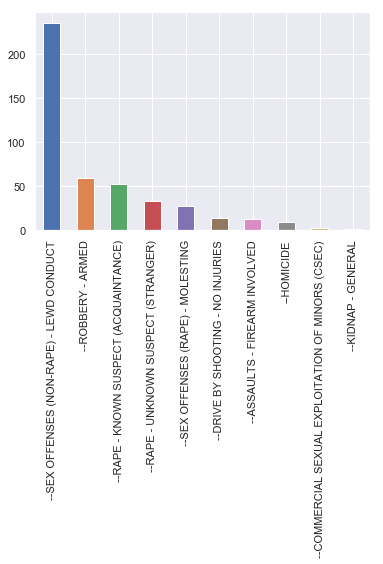

In [19]:
# Show count of final_call_type with bad dates

pd.value_counts(bad_date_arrived['final_call_type']).plot.bar()

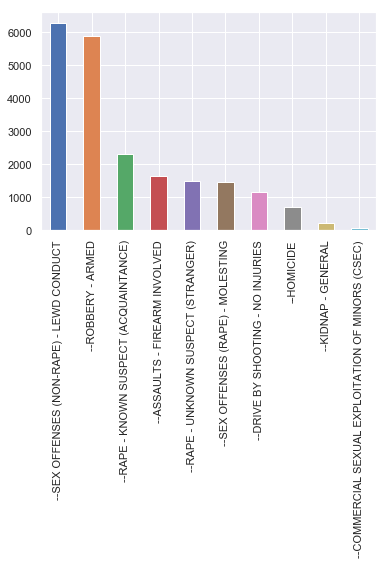

In [20]:
# Show final_call_type counts

pd.value_counts(data['final_call_type']).plot.bar()

In [22]:
# Views all rows that contain any null value

data[pd.isnull(data).any(axis=1)]

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000002185,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-02 23:17:25,2010-01-02 23:46:25,UNKNOWN,NaN,99,1.740000e+03,2010,1
2010000006111,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,NARCOTICS WARRANT SERVICE,--ROBBERY - ARMED,2010-01-06 13:53:13,1900-01-01 00:00:00,UNKNOWN,NaN,INV,-3.471775e+09,2010,1
2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000029844,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,"CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-26 19:48:36,2010-01-26 20:21:48,UNKNOWN,NaN,S,1.992000e+03,2010,1
2010000032182,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ROBBERY - ARMED,2010-01-28 17:26:27,2010-01-28 17:26:27,UNKNOWN,NaN,DET,0.000000e+00,2010,1
2010000039534,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",1,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-02-03 23:11:49,2010-02-03 23:16:57,UNKNOWN,NaN,99,3.080000e+02,2010,2
2010000041720,FOLLOW-UP REPORT MADE,ONVIEW,9,-ASSIGNED DUTY - STAKEOUT,--ROBBERY - ARMED,2010-02-05 18:41:40,2010-02-05 18:41:40,UNKNOWN,NaN,CMD,0.000000e+00,2010,2
2010000042965,FOLLOW-UP REPORT MADE,"TELEPHONE OTHER, NOT 911",9,-ASSIGNED DUTY - STAKEOUT,--ROBBERY - ARMED,2010-02-06 19:03:36,2010-02-06 19:05:23,UNKNOWN,NaN,S,1.070000e+02,2010,2


### Clean location values

In [23]:
# Clean any bad location data
# List precinct values

precinct = data['precinct'].unique().tolist()
precinct

['NORTH', 'SOUTH', 'EAST', 'SOUTHWEST', 'WEST', 'UNKNOWN']

In [24]:
# View all rows where precinct contains "UNKNOWN"

data[data.precinct.str.contains("UNKNOWN")]

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000002185,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-02 23:17:25,2010-01-02 23:46:25,UNKNOWN,NaN,99,1.740000e+03,2010,1
2010000006111,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,NARCOTICS WARRANT SERVICE,--ROBBERY - ARMED,2010-01-06 13:53:13,1900-01-01 00:00:00,UNKNOWN,NaN,INV,-3.471775e+09,2010,1
2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000029844,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,"CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-26 19:48:36,2010-01-26 20:21:48,UNKNOWN,NaN,S,1.992000e+03,2010,1
2010000032182,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ROBBERY - ARMED,2010-01-28 17:26:27,2010-01-28 17:26:27,UNKNOWN,NaN,DET,0.000000e+00,2010,1
2010000039534,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",1,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-02-03 23:11:49,2010-02-03 23:16:57,UNKNOWN,NaN,99,3.080000e+02,2010,2
2010000041720,FOLLOW-UP REPORT MADE,ONVIEW,9,-ASSIGNED DUTY - STAKEOUT,--ROBBERY - ARMED,2010-02-05 18:41:40,2010-02-05 18:41:40,UNKNOWN,NaN,CMD,0.000000e+00,2010,2
2010000042965,FOLLOW-UP REPORT MADE,"TELEPHONE OTHER, NOT 911",9,-ASSIGNED DUTY - STAKEOUT,--ROBBERY - ARMED,2010-02-06 19:03:36,2010-02-06 19:05:23,UNKNOWN,NaN,S,1.070000e+02,2010,2


In [25]:
# View all rows where sector contains "nan"

data[data.sector.isnull()]

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000002185,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-02 23:17:25,2010-01-02 23:46:25,UNKNOWN,NaN,99,1.740000e+03,2010,1
2010000006111,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,NARCOTICS WARRANT SERVICE,--ROBBERY - ARMED,2010-01-06 13:53:13,1900-01-01 00:00:00,UNKNOWN,NaN,INV,-3.471775e+09,2010,1
2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000029844,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,"CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-26 19:48:36,2010-01-26 20:21:48,UNKNOWN,NaN,S,1.992000e+03,2010,1
2010000032182,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ROBBERY - ARMED,2010-01-28 17:26:27,2010-01-28 17:26:27,UNKNOWN,NaN,DET,0.000000e+00,2010,1
2010000039534,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",1,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-02-03 23:11:49,2010-02-03 23:16:57,UNKNOWN,NaN,99,3.080000e+02,2010,2
2010000041720,FOLLOW-UP REPORT MADE,ONVIEW,9,-ASSIGNED DUTY - STAKEOUT,--ROBBERY - ARMED,2010-02-05 18:41:40,2010-02-05 18:41:40,UNKNOWN,NaN,CMD,0.000000e+00,2010,2
2010000042965,FOLLOW-UP REPORT MADE,"TELEPHONE OTHER, NOT 911",9,-ASSIGNED DUTY - STAKEOUT,--ROBBERY - ARMED,2010-02-06 19:03:36,2010-02-06 19:05:23,UNKNOWN,NaN,S,1.070000e+02,2010,2


## Which rows to keep/delete based on beat value
### TBD Beats
* LAPT --> all onviews, 8 CFS, all arrived time same as queue time
* INV --> Might involve calls started in other jurisdictions or handed off to other jurisdictions (ie: carjacking to WSP, armed robbery to FedWay)
* CTY--> 25 CFS, nearly all onviews, with all but 1 arrive time equals queue time
* CDD --> 28 CFS, most onview or non-911 phone, most onview or non-911 phone
* COMM --> 23 CFS, most are TRU initial call types, 
* WP --> 1 CFS, nothing unusual
* FS --> 2 CFS, 1 onview, 1 non-911 that took 7 hours for arrival time, both rapes
* WD --> 1 CFS, nothing unusual
* NS --> 1 CFS, 1900 arrival_time but cc is report
* MS --> 2 CFS, 1 onview, 1 non-911, 2 rpts
* SD --> 1 CFS, p1 non-911
* SPVDD --> 1 CFS, p3 rape w/ report
* ES --> 1 CFS, poss sub-station type walk-in
* CS --> 1 CFS, onview
* OS --> 3 CFS, all onviews, all armed robbery
* DET --> 69 CFS, appears to be detectives, vast majority onviews (keep for now... f/up arrests)

### Delete Beats
* CMD --> 1 CFS, was a stakeout
* WS --> 2 CFS, both non-911 phone, one was an agency assist
* US --> 2 CFS, both onview, one warrant pickup, one out to station
* CC --> 1 CFS, was broadcast 
* SWT --> 1 CFS, search warrant
* NP --> 2 CFS, 1 was search warrant, 1 f/up w arrest
* RS --> 1 CFS a direct-patrol w/ CC problem solving pjt
* SS --> 1 CFS, looks like an agency assist type call, no arrived time

### Keep Beats
* TQ --> 4 CFS, initial call type"TRU"

### Clean up beats

In [25]:
# Don't delete beats until I find out what the above beat acronyms mean

In [26]:
# Sandbox for viewing rows associated with different beat ids

data[data.beat.str.contains("WS")]

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2011000040306,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2011-02-03 10:45:08,1900-01-01 00:00:00,UNKNOWN,NaN,WS,-3.505719e+09,2011,2
2013000460253,FOLLOW-UP REPORT MADE,"TELEPHONE OTHER, NOT 911",2,ASSIST OTHER AGENCY - ROUTINE SERVICE,--ROBBERY - ARMED,2013-12-26 17:58:56,2013-12-26 18:22:21,UNKNOWN,NaN,WS,1.405000e+03,2013,12


In [27]:
# Sector values

sector = data['sector'].unique().tolist()
sector

['UNION',
 'ROBERT',
 'GEORGE',
 'FRANK',
 'SAM',
 'DAVID',
 'EDWARD',
 'BOY',
 nan,
 'MARY',
 'NORA',
 'LINCOLN',
 'JOHN',
 'KING',
 'CHARLIE',
 'QUEEN',
 'WILLIAM',
 'OCEAN']

In [28]:
# View all rows where beat contains a non-beat id

# non_beat_ids = 'SS|99|INV|LAPT|S|DET|CMD|CTY|N|CS|CDD|E|WS|US|CC|W|TQ|OS|SWT|NP|COMM|WP|FS|WD|NS|MS|SD|RS|SS|SPVDD|ES'
non_beat_ids = 'SS|99|INV|LAPT|DET|CMD|CTY|CS|CDD|WS|US|CC|TQ|OS|SWT|NP|COMM|WP|FS|WD|NS|MS|SD|RS|SS|SPVDD|ES'

# Rows to remove based on beat:
    # DET (detectives), 

data[data.beat.str.contains(non_beat_ids)]

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000002185,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-02 23:17:25,2010-01-02 23:46:25,UNKNOWN,NaN,99,1.740000e+03,2010,1
2010000006111,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,NARCOTICS WARRANT SERVICE,--ROBBERY - ARMED,2010-01-06 13:53:13,1900-01-01 00:00:00,UNKNOWN,NaN,INV,-3.471775e+09,2010,1
2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000032182,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ROBBERY - ARMED,2010-01-28 17:26:27,2010-01-28 17:26:27,UNKNOWN,NaN,DET,0.000000e+00,2010,1
2010000039534,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",1,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-02-03 23:11:49,2010-02-03 23:16:57,UNKNOWN,NaN,99,3.080000e+02,2010,2
2010000041720,FOLLOW-UP REPORT MADE,ONVIEW,9,-ASSIGNED DUTY - STAKEOUT,--ROBBERY - ARMED,2010-02-05 18:41:40,2010-02-05 18:41:40,UNKNOWN,NaN,CMD,0.000000e+00,2010,2
2010000049883,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ROBBERY - ARMED,2010-02-12 23:02:00,2010-02-12 23:02:00,UNKNOWN,NaN,99,0.000000e+00,2010,2
2010000056417,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--HOMICIDE,2010-02-19 00:32:28,2010-02-19 00:32:28,UNKNOWN,NaN,CTY,0.000000e+00,2010,2


In [29]:
# View list of beats

beat = data['beat'].unique().tolist()
# beat

### Explore TRU cfs


**More Information about TRU**

Cynthia Granard on LinkedIn: https://www.linkedin.com/in/cynthia-granard-2198b085/
She was TRU sgt in 2001-2003 (and also dispatch sgt at same time)> Connected w/ Cleo

In [30]:
# Trying to get at comparison of non-I/P violent crimes vs sexual-assaults that were reffered to TRU
# Show details of CFS for ASSAULTS - FIREARM 

priority3 = data[data.priority == 3]
priority3


,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,6.800000e+02,2010,1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,3.890000e+02,2010,1
2010000000876,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2010-01-01 17:28:02,2010-01-01 17:28:02,EAST,GEORGE,G1,0.000000e+00,2010,1
2010000000989,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-01 20:17:12,2010-01-01 20:17:12,SOUTH,SAM,S1,0.000000e+00,2010,1
2010000001744,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2010-01-02 15:52:18,2010-01-02 16:41:47,WEST,DAVID,D1,2.969000e+03,2010,1
2010000002834,PHYSICAL ARREST MADE,ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--HOMICIDE,2010-01-03 14:36:01,2010-01-03 14:36:01,NORTH,UNION,U2,0.000000e+00,2010,1
2010000002914,REPORT WRITTEN (NO ARREST),911,3,"CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED",--SEX OFFENSES (RAPE) - MOLESTING,2010-01-03 16:31:16,2010-01-03 17:33:33,WEST,MARY,M1,3.737000e+03,2010,1
2010000003715,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,PROPERTY - DAMAGE,--HOMICIDE,2010-01-04 11:31:05,1900-01-01 00:00:00,EAST,GEORGE,G2,-3.471593e+09,2010,1
2010000003806,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--KIDNAP - GENERAL,2010-01-04 13:11:59,2010-01-04 13:11:59,NORTH,NORA,N3,0.000000e+00,2010,1


In [31]:
# List p3 assault firearm calls

priority3[priority3.final_call_type.str.contains("ASSAULTS - FIREARM")]

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000000989,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-01 20:17:12,2010-01-01 20:17:12,SOUTH,SAM,S1,0.000000e+00,2010,1
2010000008657,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-08 17:00:34,2010-01-08 17:00:34,WEST,DAVID,D2,0.000000e+00,2010,1
2010000011589,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,ASLT - PERSON SHOT OR SHOT AT,--ASSAULTS - FIREARM INVOLVED,2010-01-11 10:13:21,2010-01-11 11:44:32,EAST,GEORGE,G1,5.471000e+03,2010,1
2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000015896,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-14 21:53:35,2010-01-14 21:53:35,SOUTH,SAM,S2,0.000000e+00,2010,1
2010000035837,ASSISTANCE RENDERED,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-31 20:58:58,2010-01-31 20:58:58,NORTH,BOY,B2,0.000000e+00,2010,1
2010000060339,FOLLOW-UP REPORT MADE,911,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-02-22 14:21:19,1900-01-01 00:00:00,WEST,QUEEN,Q3,-3.475837e+09,2010,2
2010000092689,FOLLOW-UP REPORT MADE,ONVIEW,3,INJURED - PERSON/INDUSTRIAL ACCIDENT,--ASSAULTS - FIREARM INVOLVED,2010-03-21 01:20:21,2010-03-21 01:20:21,EAST,GEORGE,G1,0.000000e+00,2010,3


In [32]:
# Explore TRU call

# Save rows where initial call type is TRU

TRU = data[data.initial_call_type.str.contains("TRU ")]
TRU

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000071969,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",5,TRU - ASLT - WITH OR W/O WPNS (NO SHOOTINGS),--SEX OFFENSES (RAPE) - MOLESTING,2010-03-04 08:01:18,2010-03-04 08:06:03,NORTH,LINCOLN,L1,285.0,2010,3
2010000135469,RADIO BROADCAST AND CLEAR,"TELEPHONE OTHER, NOT 911",5,TRU - RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-04-26 10:00:35,2010-04-26 10:33:27,NORTH,NORA,N3,1972.0,2010,4
2010000187117,RADIO BROADCAST AND CLEAR,"TELEPHONE OTHER, NOT 911",5,TRU - ASLT - WITH OR W/O WPNS (NO SHOOTINGS),--RAPE - UNKNOWN SUSPECT (STRANGER),2010-06-04 14:15:48,2010-06-04 15:05:24,WEST,QUEEN,Q3,2976.0,2010,6
2010000193566,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",5,TRU - RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-06-09 08:28:18,2010-06-09 09:11:39,EAST,CHARLIE,C1,2601.0,2010,6
2010000202375,ASSISTANCE RENDERED,911,5,TRU - LEWD CONDUCT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-06-15 15:23:41,2010-06-15 15:25:17,NORTH,JOHN,J3,96.0,2010,6
2010000257863,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",5,TRU - RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2010-07-26 15:08:29,2010-07-26 15:09:39,SOUTHWEST,WILLIAM,W2,70.0,2010,7
2010000339209,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",5,TRU - RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2010-09-28 10:13:59,2010-09-28 11:54:04,NORTH,BOY,B1,6005.0,2010,9
2010000408000,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",5,TRU - LEWD CONDUCT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-11-24 11:07:44,2010-11-24 12:19:55,SOUTHWEST,FRANK,F2,4331.0,2010,11
2011000055938,REPORT WRITTEN (NO ARREST),911,5,TRU - ASLT - WITH OR W/O WPNS (NO SHOOTINGS),--SEX OFFENSES (RAPE) - MOLESTING,2011-02-16 14:53:01,2011-02-16 14:54:43,SOUTH,ROBERT,R3,102.0,2011,2


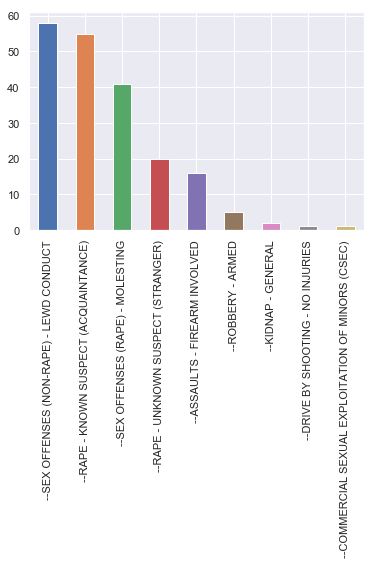

In [33]:
# Visualize counts of calls that started at TRUs

pd.value_counts(TRU.final_call_type).plot.bar()

In [37]:
# 2018 Q1 All calls with inital call type = TRU:
# https://data.seattle.gov/d/j6ey-6rgk 


### ID sexual assault cfs

In [38]:
# Define terms that id sex-based crimes

sexual_assault_terms = 'CSEC|LEWD|MOLESTING|STRANGER|ACQUAINTANCE'
sexual_assault_terms

'CSEC|LEWD|MOLESTING|STRANGER|ACQUAINTANCE'

In [39]:
# View calls that are sex-based crimes

sexual_assault_mask = data['final_call_type'].str.contains(sexual_assault_terms)

stage = data[sexual_assault_mask]
stage.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80.0,2010,2
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,680.0,2010,1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,389.0,2010,1
2010000000876,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2010-01-01 17:28:02,2010-01-01 17:28:02,EAST,GEORGE,G1,0.0,2010,1
2010000001201,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-02 00:37:29,2010-01-02 00:42:16,WEST,DAVID,D2,287.0,2010,1


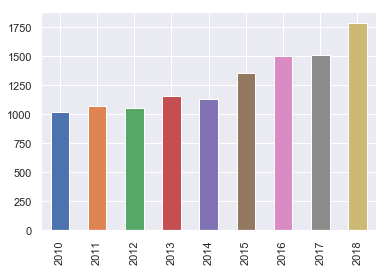

In [40]:
# Sandbox for each sexual assault by year


# All sexual assaults by year (upwards trend)
pd.value_counts(stage.year).reindex([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]).plot.bar()

# All sexual assaults by month of year
# pd.value_counts(stage.month).plot.bar()

In [41]:
# Define terms that id rape CFS

rape_terms = 'STRANGER|ACQUAINTANCE'
rape_terms

'STRANGER|ACQUAINTANCE'

In [42]:
# Create masks for all rape call types

is_rape_mask = data['final_call_type'].str.contains(rape_terms)
is_stranger_rape = data['final_call_type'].str.contains("STRANGER")
is_acquaintance_rape = data['final_call_type'].str.contains("ACQUAINTANCE")


stage_is_rape_cfs = data[is_rape_mask]
stage_is_acquaintance_rape = data[is_acquaintance_rape]
stage_is_stranger_rape = data[is_stranger_rape]

# stage_is_stranger_rape_cfs.head()
# stage_is_rape_cfs.head()
# stage_is_acquaintance_rape.head()

# Get the years


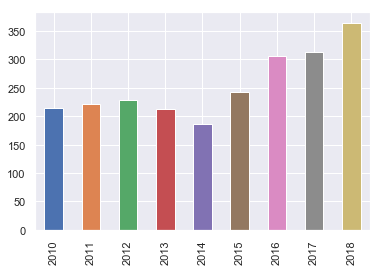

In [43]:
# Sandbox for rapes by year


# All rapes by year
# pd.value_counts(stage_rape_cfs.year).plot.bar()

# All stranger rapes by year
# pd.value_counts(stage_is_stranger_rape.year).plot.bar()

# All acquaintance rapes by year
pd.value_counts(stage_is_acquaintance_rape.year).reindex([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]).plot.bar()



# All rapes by month of year
# pd.value_counts(stage_rape_cfs.month).plot.bar()


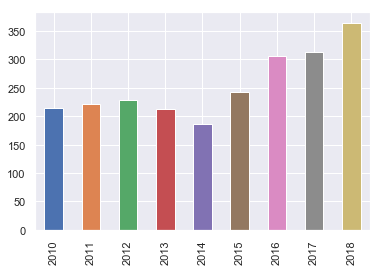

In [44]:
# Sandbox for stacked bar chart exploring all rapes

pd.value_counts(stage_is_acquaintance_rape.year).reindex([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]).plot.bar(stacked=True)

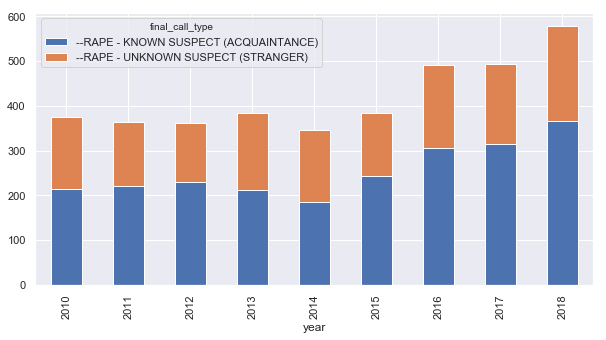

In [45]:
# Stacked bar chart showing all rapes by year

stage_is_rape_cfs.groupby('final_call_type').year.value_counts().unstack(0).plot.bar(stacked=True, figsize=(10,5))

#pd.value_counts(stage_is_acquaintance_rape.year).reindex(
  #  [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]).plot.bar(stacked=True)

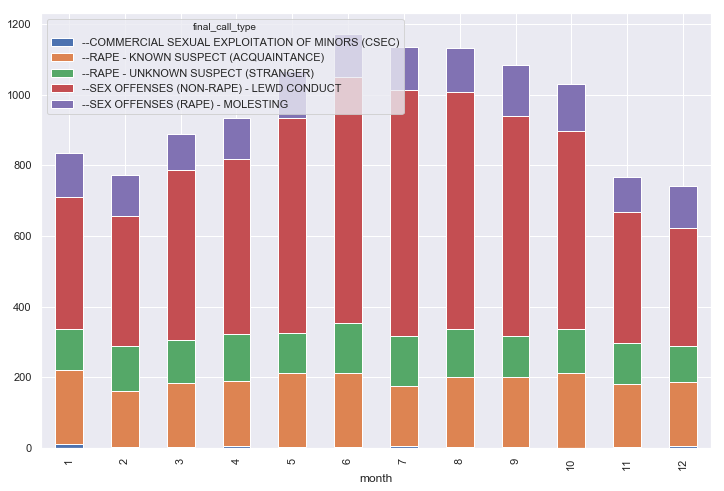

In [66]:
# Stacked bar chart showing all sex crimes by year

#stage.groupby('final_call_type').year.value_counts().unstack(0).plot.bar(stacked=True, figsize=(12,8))
stage.groupby('final_call_type').month.value_counts().unstack(0).plot.bar(stacked=True, figsize=(12,8))


## Explore geography of call data

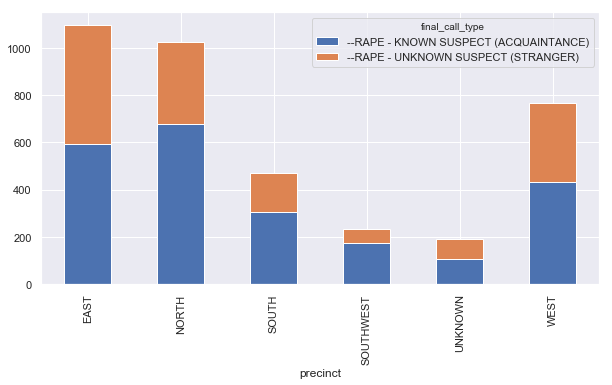

In [61]:
# Plot all rapes by precinct - total 2010-2018
# Add line graph overlay of population that lives in each of these precinct. Unsure of unit of measurement for this
stage_is_rape_cfs.groupby('final_call_type').precinct.value_counts().unstack(0).plot.bar(stacked=True, figsize=(10,5))


In [51]:
# Plot all rapes for each precinct - by year


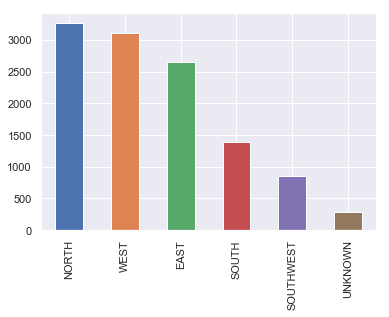

In [64]:
# Plot all sexual assaults by precinct - total 2010-2018

pd.value_counts(stage.precinct).plot.bar()


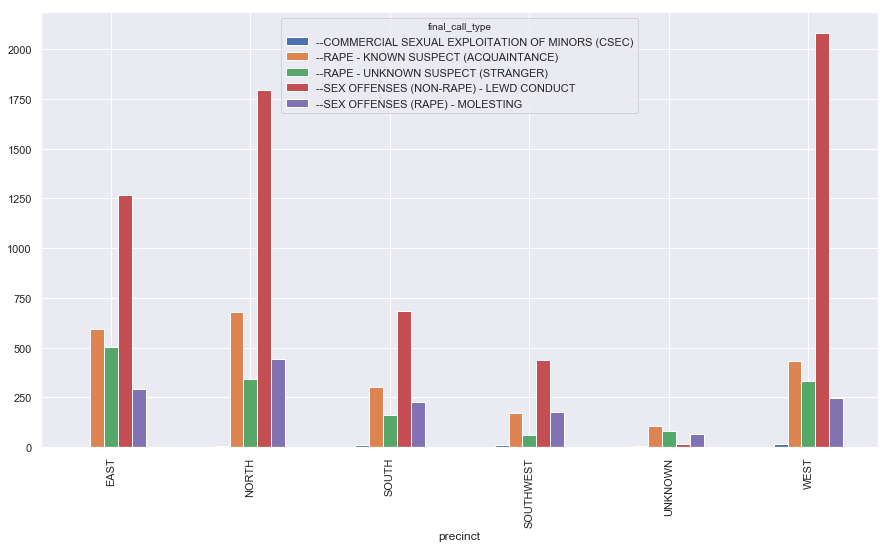

In [80]:
# Plot all sexual assaults by precinct - total 2010-2018

stage.groupby('final_call_type').precinct.value_counts().unstack(0).plot.bar(stacked=False, figsize=(15,8))


In [ ]:
# Plot lewd conduct by precinct - total 2010-2018


In [53]:
# Plot lewd conduct by precinct - by year




KeyboardInterrupt: 

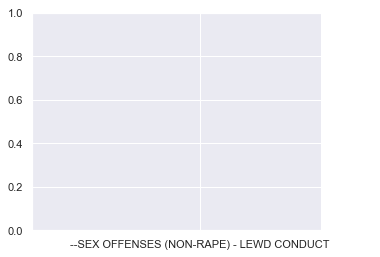

In [53]:
call_type = stage['final_call_type'].values
location = stage['precinct'].values

plt.hist(call_type)
plt.show()